# Decision Tree

In this section, we will implement the decision tree algorithm using Python's Scikit-Learn library. In the following examples we'll solve both 
classification as well as regression problems using the decision tree.

#### References

https://www.kaggle.com/code/aysenur95/clustering-anuran-calls-mfccs/notebook#EDA

https://www.kaggle.com/code/kerneler/starter-anuran-calls-mfccs-data-set-940128a2-6

In [89]:
# Load libraries
import pandas as pd # For data manipulation
import numpy as np # For data manipulation|

In [90]:
df = pd.read_csv('frogs_mfcc.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Species
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,AdenomeraAndre
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,AdenomeraAndre
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,AdenomeraAndre
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,AdenomeraAndre
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,ScinaxRuber
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,ScinaxRuber
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,ScinaxRuber
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,ScinaxRuber


### Data visualization

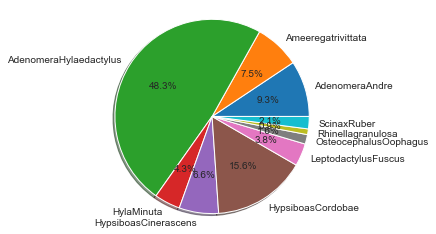

In [93]:
import matplotlib.pyplot as plt

names = list(df["Species"].unique())
sizes = [df["Species"].value_counts()[unique_class]*100/len(df["Species"]) for unique_class in names]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=names, autopct="%1.1f%%", shadow=True)
plt.axis("equal")
plt.show()

In [80]:
# Divide into attributes and label
X = df.drop('Species', axis=1)
y = df['Species']

### Feature Selection

In this case, we used ANOVA feature selection method to select our features. This is because ANOVA feature selection works well with numerical input, but categorical output. We chose to have a maximum of 19 features selected is because after testing, we found out that roughly 19 features produces the best accuracy for our model.

#### Reference
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ 

In [81]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_selection = SelectKBest(score_func=f_classif, k=19)
X = feature_selection.fit_transform(X, y)

In [82]:
# Split dataset into training set and test set
# Split up 30% of the data in to the test set and 70% for training
from sklearn.model_selection import train_test_split # For splitting the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.97      0.94      0.96       183
AdenomeraHylaedactylus       0.99      0.99      0.99      1056
    Ameeregatrivittata       0.96      0.93      0.94       165
            HylaMinuta       0.79      0.83      0.81        93
  HypsiboasCinerascens       0.97      0.97      0.97       146
     HypsiboasCordobae       0.95      0.94      0.94       338
   LeptodactylusFuscus       0.89      0.91      0.90        81
 OsteocephalusOophagus       0.70      0.82      0.76        40
     Rhinellagranulosa       0.89      0.81      0.85        21
           ScinaxRuber       0.70      0.72      0.71        36

              accuracy                           0.95      2159
             macro avg       0.88      0.89      0.88      2159
          weighted avg       0.95      0.95      0.95      2159

[[ 172    1    3    0    0    1    2    2    0    2]
 [   0 1045    0    8    0    3    0    0    0  